In [1]:
from fastai.vision.all import *

In [2]:
path = "/tmp/cg-training-set"
failed = verify_images(get_image_files(path))
failed

(#0) []

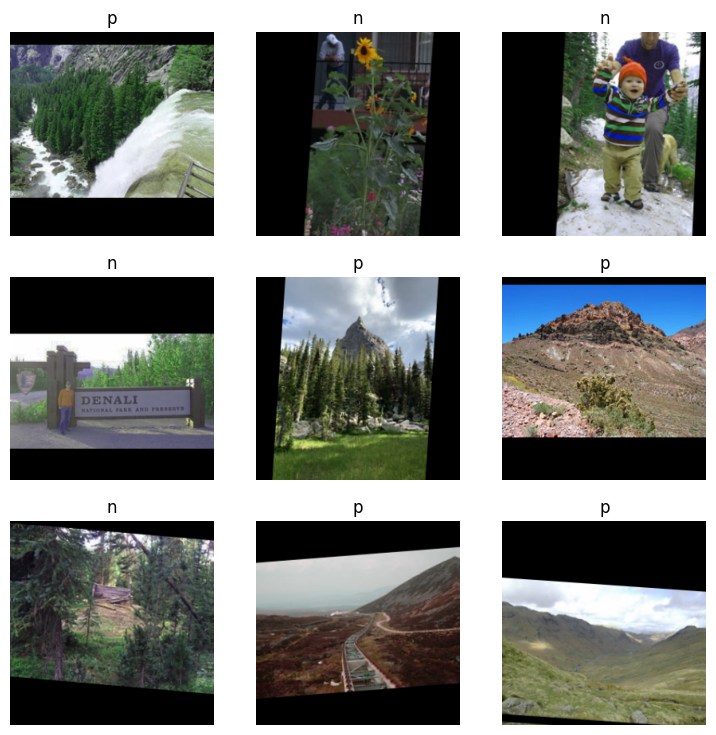

In [3]:
data_block_256 = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[
        Resize(method="pad", pad_mode="zeros", size=256),
    ],
    batch_tfms=[
        Brightness(),
        Contrast(max_lighting=0.5),
        Hue(),
        Rotate(max_deg=5),
    ]
)
dls_256 = data_block_256.dataloaders(path)
dls_256.show_batch()

In [5]:
l_256 = vision_learner(dls_256, resnet34, metrics=[accuracy])
l_256.fine_tune(10)
# 256, resnet18: 91.1%
# 256, resnet34: 91.8%

epoch,train_loss,valid_loss,accuracy,time
0,0.650505,0.437510,0.846442,01:55


epoch,train_loss,valid_loss,accuracy,time
0,0.415395,0.325801,0.883895,03:08
1,0.305598,0.291562,0.890137,03:20
2,0.234250,0.264635,0.901373,03:15
3,0.182599,0.237172,0.913233,03:18
4,0.125473,0.344584,0.902622,03:16
5,0.102183,0.313274,0.917603,03:18
6,0.064122,0.318918,0.911361,03:21
7,0.043619,0.326761,0.917603,03:22
8,0.025783,0.346786,0.915106,03:23
9,0.019856,0.345895,0.916355,03:24


In [1]:
data_block_512 = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[
        Resize(method="pad", pad_mode="zeros", size=512),
    ],
    batch_tfms=[
        Brightness(),
        Contrast(max_lighting=0.5),
        Hue(),
        Rotate(max_deg=5),
    ]
)
dls_512 = data_block_512.dataloaders(path)
dls_512.show_batch()

NameError: name 'DataBlock' is not defined

In [9]:
l_512 = vision_learner(dls_512, resnet18, metrics=[accuracy])
l_512.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 